Hospital data preprocessing for severity prognosis study in COVID-19

Autors: Maria Gabriela Valeriano, Ana Carolina Lorena, Carlos Kiffer

Source: Hospital Sírio Libanes, made available by FAPESP through COVID-19 Data Sharing/BR-USP. The original data is available at https://repositoriodatasharingfapesp.uspdigital.usp.br/

The data is divided in three files: Pacients, Tests and Outcomes. Each patient has an id and each patient hospital visit receive an new id_attendance as identification. 

In the file tests, there are some cases when the same test have similar but divergent label. This cases were resolved with the help of an expert. The file 'HSL_Exames_4_labels.csv' have this issues corrected. 

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
#file: Pacientes

#read the file
patients <- read.csv("HSL_Pacientes_4.csv", sep = "|", stringsAsFactors = FALSE)

#dimensions
patients %>% dim

#check for repeated lines 
patients %>% unique %>% dim


[1] 14673     7

[1] 14673     7

In [3]:
#rename columns
names(patients) <- c('id', 'sex', 'birth_year', 'country', 'state', 'city', 'zip_code')

#number of patients
patients %>% select(id) %>% unique %>% nrow

[1] 14673

In [4]:
#file: tests

#read file
tests <- read.csv("HSL_Exames_4_labels.csv", stringsAsFactors = FALSE)

#dimensions
tests %>% dim

#check for repeated lines 
tests %>% unique %>% dim

#remove repeated lines 
tests %>% unique -> tests

#number of patients in file 
tests %>% select(id) %>% unique %>% dim



[1] 2952999      10

[1] 2891301      10

[1] 14673     1

In [5]:
#convert commas -> dots
tests <- data.frame(lapply(tests, function(x) {gsub(",", ".", x)}))


In [6]:
#rename columns
names(tests) <- c('id', 'id_attendance', 'test_date', 'place', 'result', 'measurement_unit', 'normal_value', 'test', 'analyte', 'test_analyte')
tests %>% select(id_attendance) %>% unique %>% dim

[1] 37364     1

In [7]:
#file: Desfechos

#read the file
outcomes <- read.csv("HSL_Desfechos_4.csv", sep = "|", stringsAsFactors = FALSE) 

#dimensions
outcomes %>% dim

#check for repeated lines 
outcomes %>% unique %>% dim

[1] 89937     8

[1] 89937     8

In [8]:
#rename columns 'clinic', 'result', 'measurement_unit', 'normal_value', 'test', 'analyte', 'test_analyte'
names(outcomes) <- c('id', 'id_attendance', 'attendance_date', 'attendance_type', 'id_clinic', 'clinic', 'outcome_date','outcome_patient')

#number of patients and attendances
outcomes %>% select(id) %>% unique %>% dim
outcomes %>% select(id_attendance) %>% unique %>% dim

[1] 14672     1

[1] 89937     1

In [9]:
#when outcome_patient == death, it does not have outcome_date 
#this issue is due to the criteria adopted for anonymization by the institution that provided the data

outcomes %>% 
filter(str_detect(outcome_patient, 'Óbito')) %>%  
count(outcome_date)

outcome_date,n
<chr>,<int>
DDMMAA,202


In [10]:
#check the birth_year
patients %>% count(birth_year)

#when birth year == AAAA the year of birth is equal to or before 1930 
#information given by institution that provided the data
patients$birth_year[patients$birth_year == 'AAAA'] <- '1930'

#check the transformation
patients %>% count(birth_year)

birth_year,n
<chr>,<int>
1931,18
1932,22
1933,32
1934,33
1935,37
1936,38
1937,38
1938,44
1939,51


birth_year,n
<chr>,<int>
1930,125
1931,18
1932,22
1933,32
1934,33
1935,37
1936,38
1937,38
1938,44


In [11]:
#transform the colums outcome_date, attendance_date and test_date to date format
outcomes$outcome_date <- as.Date(outcomes$outcome_date, format="%d/%m/%Y")
outcomes$attendance_date<- as.Date(outcomes$attendance_date, format="%d/%m/%Y")
tests$test_date <- as.Date(tests$test_date, format="%d/%m/%Y")

#dimensions
outcomes %>% dim

#create a new column with the number of days between the first attendance and the outcome 
outcomes %>% mutate(outcome_days = (difftime(outcomes$outcome_date, outcomes$attendance_date, unit = "days"))) -> outcomes
outcomes$outcome_days <- as.integer(outcomes$outcome_days)


[1] 89937     8

In [ ]:
#check attendance_date
outcomes %>% count(attendance_date)

In [12]:
#join patients, tests and outcomes
tests %>% left_join(patients) -> tests
tests %>% left_join(outcomes) -> tests

#check how many patients (ids) are present 
tests %>% select(id) %>% unique %>% dim
tests %>% select(id_attendance) %>% unique %>% dim

#create a new column with the number of days between the first attendance and the test
tests %>% mutate(test_days = (difftime(tests$test_date, tests$attendance_date,  unit = "days"))) -> tests
tests$test_days <- as.integer(tests$test_days)

#dimensions
tests %>% dim

Joining, by = "id"

Joining, by = c("id", "id_attendance")



[1] 14673     1

[1] 37364     1

[1] 2891301      24

In [14]:
#filter 1 - patients who confirmed covid by crp test up to 15 days after attendance

#filter 'pcr' in the column test
tests %>% filter (str_detect(test, "pcr")) -> test_pcr

#check analytes
test_pcr %>% count(analyte)

analyte,n
<chr>,<int>
adenovirus determinação quantitativa dna,10
baar após homog nalcnaoh pesquisa,1
baar exame direto pesquisa,1
baar material,1
bcrabl quantific,2
bcrabl1p210 resposta molecular,2
bcrabl1p210 transcritos controle endógeno,7
clam trachomatis pcr,69
clostridium difficile deleção no gene tcdc,52


In [15]:
#check 'coronavírus' in the column analyte
test_pcr %>% filter (str_detect(analyte, "coronavírus"))  %>% count(analyte)

#filter 'coronavírus' in the column analyte
test_pcr %>% filter (str_detect(analyte, "coronavírus"))  -> test_pcr



analyte,n
<chr>,<int>
coronavírus 2019ncov,8200
detecção de coronavírus ncov2019 por pcr anatomia patológica,10612
virusmol coronavírus 229e,91
virusmol coronavírus hku1,91
virusmol coronavírus nl63,91
virusmol coronavírus oc43,91


In [16]:
#check the two first analytes 
test_pcr %>% filter (!(str_detect(analyte, "rusmol"))) %>% count(analyte)

#filter the two first analytes
test_pcr %>% filter (!(str_detect(analyte, "rusmol"))) -> test_pcr

test_pcr %>% count(test)

analyte,n
<chr>,<int>
coronavírus 2019ncov,8200
detecção de coronavírus ncov2019 por pcr anatomia patológica,10612


test,n
<chr>,<int>
covid19pcr para sarscov2 fleury,8200
detecção de coronavírus ncov2019 por pcr anatomia patológica,10612


In [17]:
#check results
test_pcr %>% count(result)

#check the positive cases
test_pcr %>% filter (str_detect(result, "DETECTADO") & !str_detect(result, "NÃO")) %>% count(result)

result,n
<chr>,<int>
DETECTADO,12141
DETECTADO (POSITIVO),3764
DETECTÁVEL,73
Inconclusivo,9
INCONCLUSIVO,9
INDETECTÁVEL,68
NÃO DETECTADO,866
NÃO DETECTADO (NEGATIVO),1882


result,n
<chr>,<int>
DETECTADO,12141
DETECTADO (POSITIVO),3764


In [18]:
#filter the positive cases
test_pcr %>% filter (str_detect(result, "DETECTADO") & !str_detect(result, "NÃO")) -> test_pcr_positive

In [19]:
#between the positive cases, filter only that comfirmet up to 15 days after attendance 
test_pcr_positive %>% filter(test_days < 16) -> test_pcr_positive

#check the filter
test_pcr_positive %>% count(test_days)

test_days,n
<int>,<int>
-3,1
-1,5
0,14694
1,301
2,61
3,47
4,37
5,40
6,32


In [20]:
#select the id_attendance of patients who confirmed up to 15 days
test_pcr_positive %>% 
select(id_attendance) %>% unique -> id_positive

#number of id_attendance
id_positive %>% tally

#filter tests from these patients
tests %>% filter(id_attendance %in% id_positive$id_attendance) -> tests

#number of tests
tests %>% dim


n
<int>
15262


[1] 1214711      24

In [21]:
#number of ids and attendances
tests %>% select(id) %>% unique %>% dim
tests %>% select(id_attendance) %>% unique %>% dim

[1] 14412     1

[1] 15262     1

In [22]:
#filter 2 - tests collect up to 4 days after attendance
tests %>% filter(test_days == "0" | test_days == "1" | test_days == "2" | test_days == "3" | test_days == "4") -> tests

#check the filter
tests %>% count(test_days)

test_days,n
<int>,<int>
0,240957
1,75063
2,54303
3,52522
4,50694


In [23]:
#number of patients and attendances
tests %>% select(id_attendance) %>% unique() %>% dim
tests %>% select(id) %>% unique() %>% dim

#dimensions
tests %>% dim

[1] 15253     1

[1] 14405     1

[1] 473539     24

In [26]:
#some tests were realized more than once whithin the same id_attendance, keep just the first value 
tests %>% group_by(id_attendance,  test_analyte) %>% arrange((test_days)) %>% slice(1) %>% ungroup -> data

#dimensions
data %>% dim 

[1] 242041     24

In [28]:
#how many lines with hospitalization > 9
data %>% filter(outcome_days > 9) %>% dim

[1] 58651    24

In [27]:
#check outcome_patients
data %>% count(outcome_patient)

outcome_patient,n
<chr>,<int>
Alta a pedido,1945
Alta Administrativa,32605
Alta médica curado,1837
Alta médica Inalterado,1280
Alta médica melhorado,192052
Alta por abandono,880
Assistência Domiciliar,178
Desistência do atendimento,4
Óbito após 48hs de internação sem necrópsia,8812


In [29]:
death_1 <- 0
death_2 <- 0
death_3 <- 0
hospitalized <- 0

#create a new column 'severity'
data %>% mutate(severity = 0) -> data

for (i in (1:nrow(data))){ #run through the entire file 
  days <- data$outcome_days[i]
  outcome <- data$outcome_patient[i]
    
  #if the patient was hospitalized for more than 9 days
  if (data$attendance_type[i] == "Internado" & !(is.na(days)) & days > 9){ 
   data$severity[i] <- 1
   hospitalized = hospitalized+1
   }
      
  #if death1
  if (!(is.na(outcome)) &
      outcome == "Óbito após 48hs de internação sem necrópsia")
  {   data$severity[i] <- 1 
      death_1 = death_1+1}
    
  #if death2
  if (!(is.na(outcome)) &
      outcome == "Óbito nas primeiras 48hs de internação sem necrópsia não agônico")
  {   data$severity[i] <- 1 
      death_2 = death_2+1}
    
  #if death3
  if (!(is.na(outcome)) &
      outcome == "Óbito nas primeiras 48hs de internação sem necrópsia agônico")
  {   data$severity[i] <- 1 
      death_3 = death_3+1}

}

data %>% count(severity)
death_1
death_2
death_3
hospitalized

severity,n
<dbl>,<int>
0,173587
1,68454


[1] 8812

[1] 1555

[1] 58

[1] 58029

In [30]:
#convert sex in numeric type
as.character(data$sex) -> data$sex
data$sex[data$sex == "F"] <- 1
data$sex[data$sex == "M"] <- 0
as.numeric(data$sex) -> data$sex
data %>% count(sex)

#create the column age
data %>% mutate(age = (as.numeric(format(as.Date(data$attendance_date), '%Y')) -  
                as.numeric(data$birth_year))) -> data

#check column
data %>% count(age)

sex,n
<dbl>,<int>
0,141902
1,100139


Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


age,n
<dbl>,<int>
0,35
1,421
2,191
3,172
4,37
5,83
6,36
7,114
8,332


In [32]:
#pivot turning each patient into a line 
data %>%   select(c(1,2,5,10,11,17,26,25)) %>% #select columns: id, id_attedance, test_analyte, result, age, sex, attendance_date and severity
  pivot_wider(names_from = test_analyte, values_from = result) %>%  #pivot converting test_analyte in several columns
  ungroup -> data

#check class numbers
data %>% count(severity)

#dimensions              
data %>% dim

severity,n
<dbl>,<int>
0,14324
1,929


age,n
<dbl>,<int>
0,3
1,34
2,41
3,35
4,32
5,28
6,33
7,39
8,46


[1] 15253   682

In [33]:
#filter 4 - remove patients who did not have blood count 
data = data[!is.na(data$'hemograma/neutrófilos'),  ]

#dimensions
data %>% dim

#check class numbers
data %>% count(severity)

#number of ids and attendances
data %>% select(id_attendance) %>% unique %>% dim
data %>% select(id) %>% unique %>% dim

[1] 4281  682

severity,n
<dbl>,<int>
0,3356
1,925


[1] 4281    1

[1] 4180    1

In [34]:
#filter 5 - keep just the last id_attendance for each id
data %>% group_by(id) %>% arrange(desc(attendance_date)) %>% slice(1) %>% ungroup -> data

#dimensions
data %>% dim

#check class numbers
data %>% count(severity)

#check attendance_date
data %>% count(attendance_date)

#remove attedance_date
data %>% select(-c(attendance_date)) -> data

[1] 4180  682

severity,n
<dbl>,<int>
0,3275
1,905


attendance_date,n
<chr>,<int>
2020-03-08,1
2020-03-11,1
2020-03-14,1
2020-03-15,3
2020-03-16,7
2020-03-17,7
2020-03-18,5
2020-03-19,6
2020-03-20,6


In [35]:
#turns some strings into numeric values 
data <- data.frame(lapply(data, function(x) {gsub("superior a", "", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "inferior a", "", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "1.000.000.", "1000000", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "g/L", "", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "1.000.000", "1000000", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "negativa", "0", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "Parcial Positivo", "1", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "Parcial Nositivo", "0", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "POSITIVO", "1", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "NEGATIVO", "0", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "NÃO REAGENTE", "0", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "REAGENTE", "1", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "Indeterminado", "NA", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "não reagente", "0", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "REAGENTE. maior ou igual a 1000", "1000", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "Parcial Negativo", "0", x)}))

In [ ]:
#check data colnames
data %>% colnames

In [36]:
#convert all columns in numeric
data <- as.data.frame(lapply(data, as.numeric))

Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.num

Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.num

In [37]:
#functions to remove extrem values

#library used to turn values in NA
library(naniar)

#turn in NA extreme values on the right (mean > median)
extremes_r <- function(x) {

  #turn each x in column tibble  
  x %>% as.tibble -> x
  names(x) <- ('value')

  #sets the 4 extreme values on the right 
  x %>% na.omit %>% count(value) %>% slice(tail(row_number(), 4)) %>% select(1) %>% as.list -> values
  values[[1]] ->> values

  #turn these values in NA
  x %>% replace_with_na_all(condition = ~.x %in% values) -> x
  
} 

#turn in NA extreme values on the left (median > mean)
extremes_l <- function(x) {

  #turn each x in column tibble 
  x %>% as.tibble -> x
  names(x) <- ('value')

  #sets the 4 extreme values on the left
  x %>% count(value) %>% slice(1:4) %>% select(1) %>% as.list -> values
  c(values[[1]]) ->> values

  #turn these values in NA
  x %>% replace_with_na_all(condition = ~.x %in% values) -> x

  
}

#turn in NA extreme values on the left (median > mean)
extremes_rl <- function(x) {

  #turn each x in column tibble 
  x %>% as.tibble -> x
  names(x) <- ('value')

  #sets the 2 extreme values on the right 
  x %>% count(value) %>% slice(1:2) %>% select(1) %>% as.list -> values
  c(values[[1]]) ->> values

  #sets the 2 extreme values on the right 
  x %>% na.omit %>% count(value) %>% slice(tail(row_number(), 2)) %>% select(1) %>% as.list -> values2
  c(values2[[1]]) ->> values2

  #turn these values in NA
  x %>% replace_with_na_all(condition = ~.x %in% values2) -> x
  x %>% replace_with_na_all(condition = ~.x %in% values) -> x

}

#decide if remove extreme values on the left, right or both
remove_extremes <- function(x) {
    
    #turn each x in column tibble 
    x %>% as.tibble -> x  
    names(x) <- ('value')
    
    #only remove extreme values if there are more than 20 values for the feature
    if (nrow(count(x,value)) > 20) {
        
        #calculate mean, median and amplitude
        x[[1]] -> x 
        mean <- x %>% mean(na.rm = TRUE)
        median <- x %>% median(na.rm = TRUE)
        amplitude <- abs(max(x, na.rm = TRUE) - min(x, na.rm = TRUE))

        #if the mean is in the center of the histogram remove extreme values from right and left
        if ((4*amplitude/10) < mean & mean < (5*amplitude/10)){
            x %>% extremes_rl -> x
        } else {
            
            #if the mean is not in the center of the histogram and mean > median remove extrems from right
            if (mean > median){
                x %>% extremes_r -> x
                
              #if the mean is not in the center of the histogram and mean < median remove extrems from right  
            } else {
                x %>% extremes_l -> x
            }
        }
    }
    
    return(x)
}    

In [38]:
#remove the extrem values
n <- names(data) %>% `names<-`(c(.))
data %>% map(~ remove_extremes(.)) %>% as.data.frame -> data
names(data) <-n

Warning message:
“`as.tibble()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [39]:
#filter 6 - tests with a maximum of 50% missing values per class 

#filter only the severe patients
data %>% filter(severity == 1) -> severe

#filter tests with a maximum of 90% missing values
columns = c()
for (i in 1:ncol(data)) { 
  temp = sum(!is.na(severe[,i]))
  if (temp >= (nrow(severe)/2)) {columns <- append(columns, i)}
}

data %>% select(all_of(columns)) -> data
data %>% ncol

#filter only the severe patients
data %>% filter(severity == 0) -> n_severe

#filter tests with a maximum of 90% missing values  
columns = c()
for (i in 1:ncol(data)) { 
  temp = sum(!is.na(n_severe[,i]))
  if (temp >= (nrow(n_severe)/2)) {columns <- append(columns, i)}
}

data %>% select(all_of(columns)) -> data
data %>% ncol

[1] 61

[1] 36

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(i)` instead of `i` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.

Warning message:
“Removed 155 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


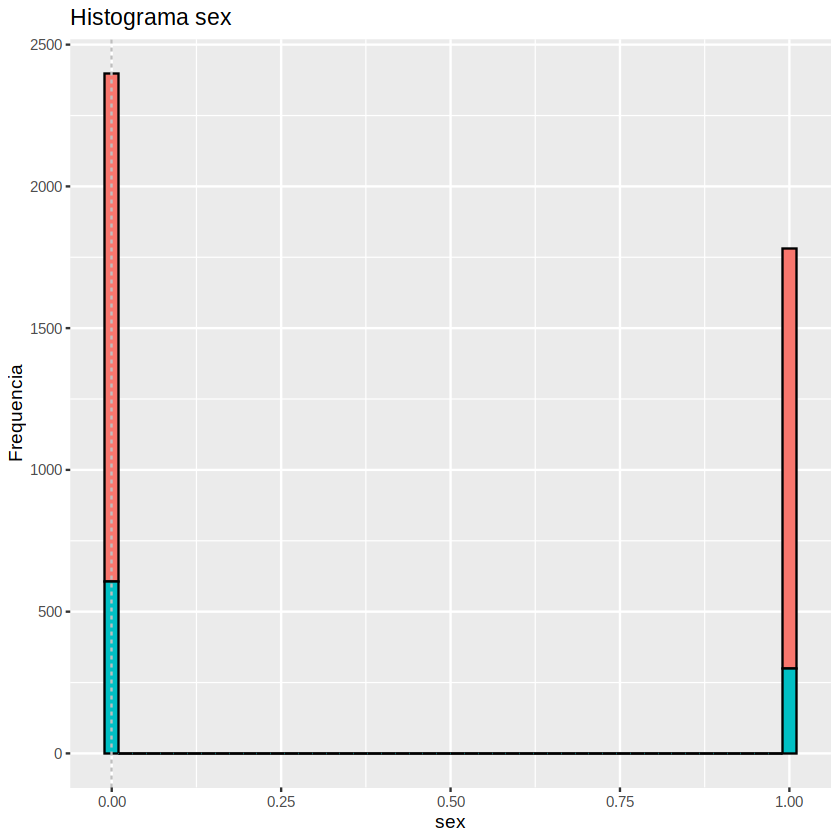

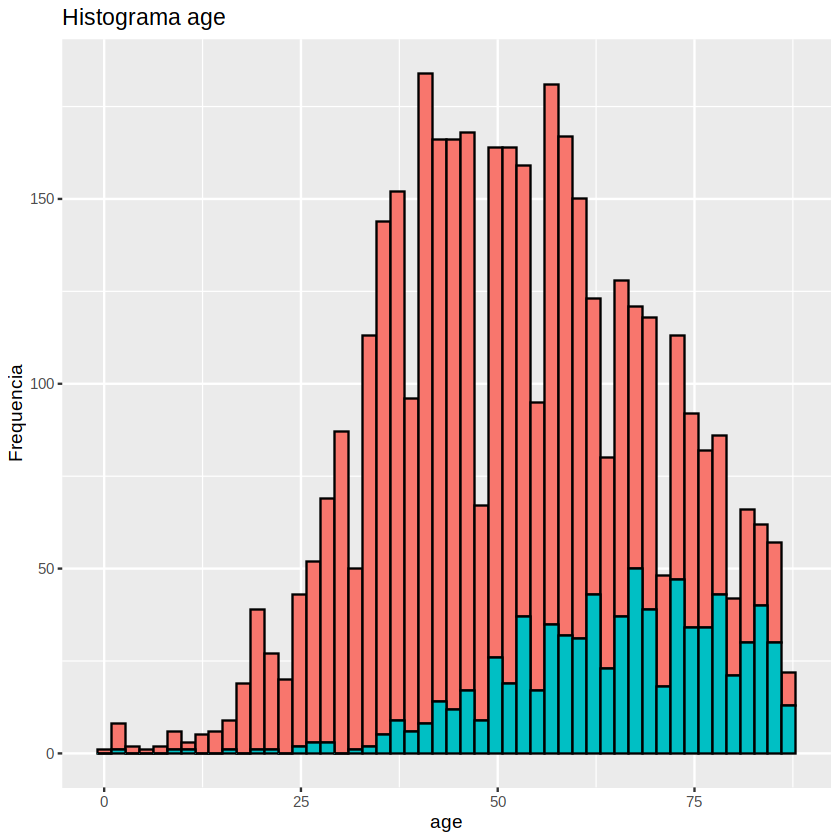

Warning message:
“Removed 509 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


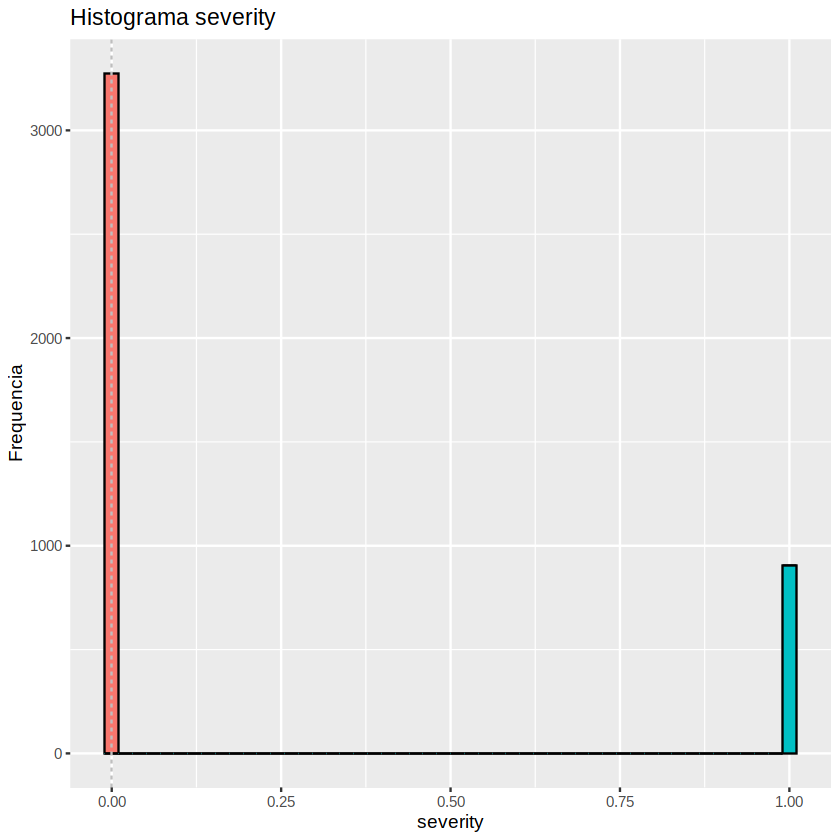

Warning message:
“Removed 506 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


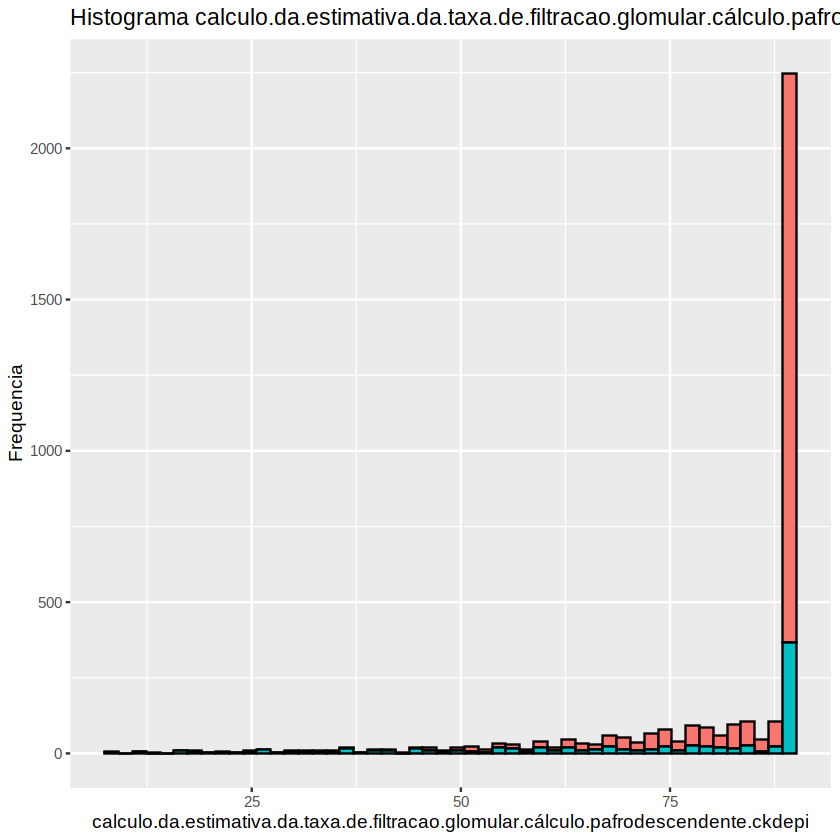

Warning message:
“Removed 511 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


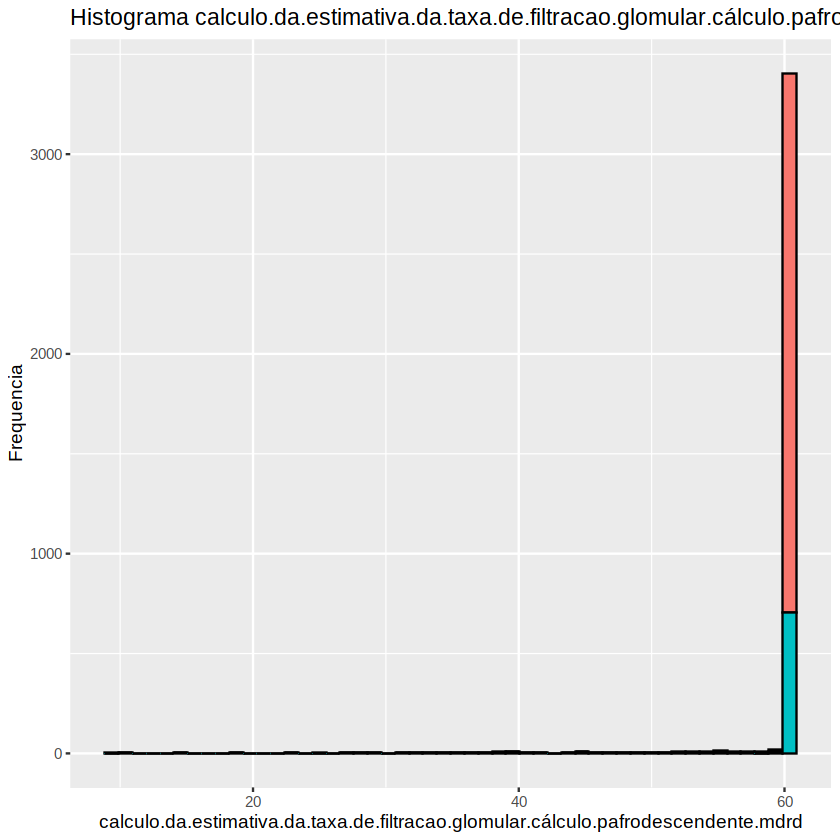

Warning message:
“Removed 509 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


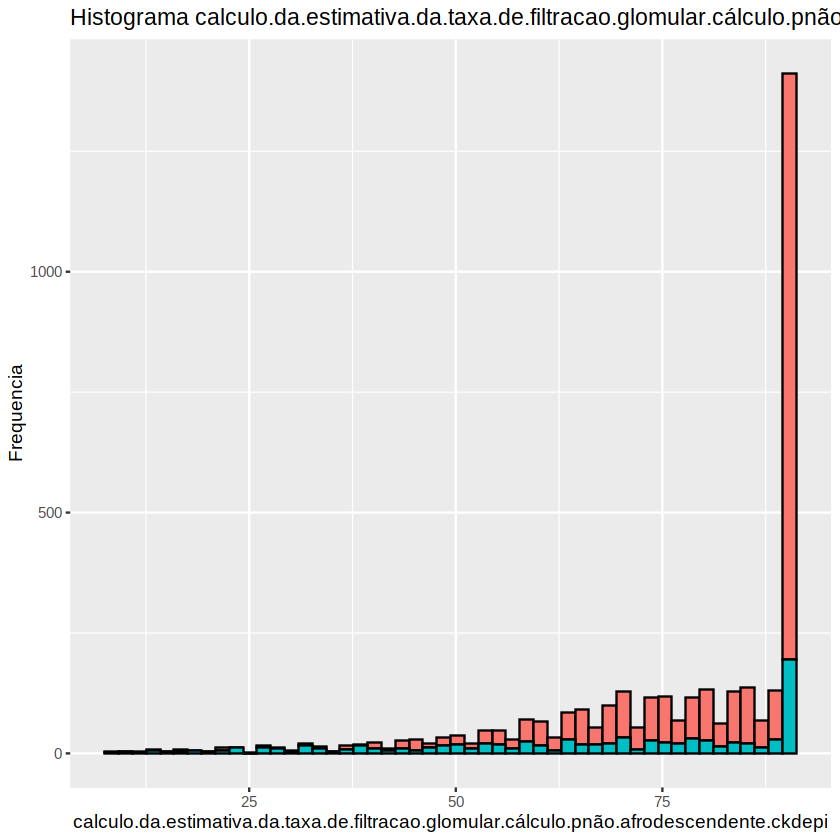

Warning message:
“Removed 500 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


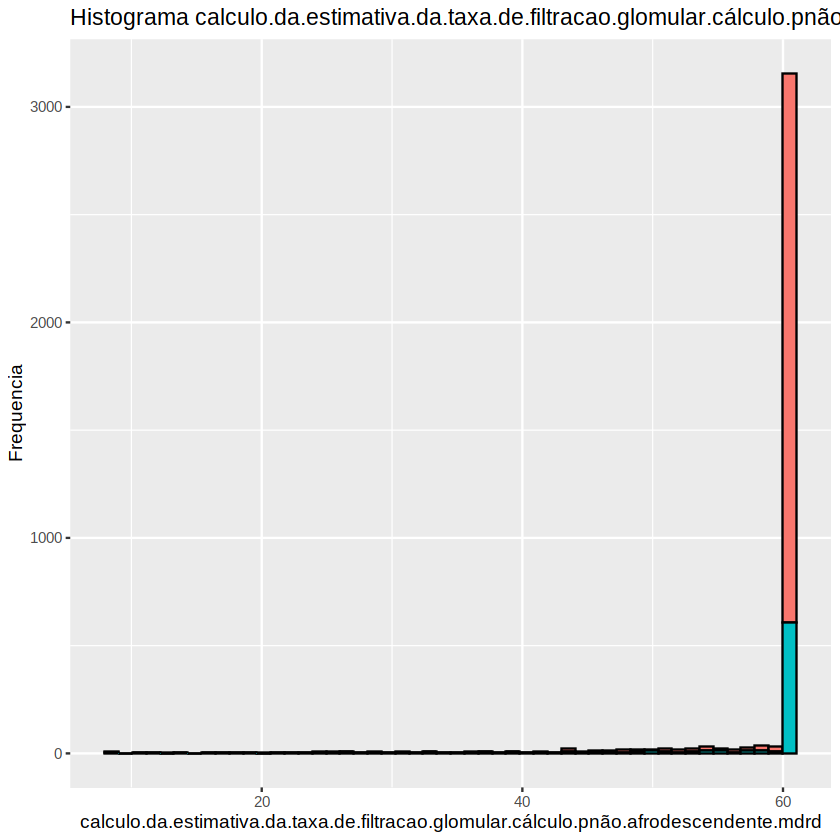

Warning message:
“Removed 299 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


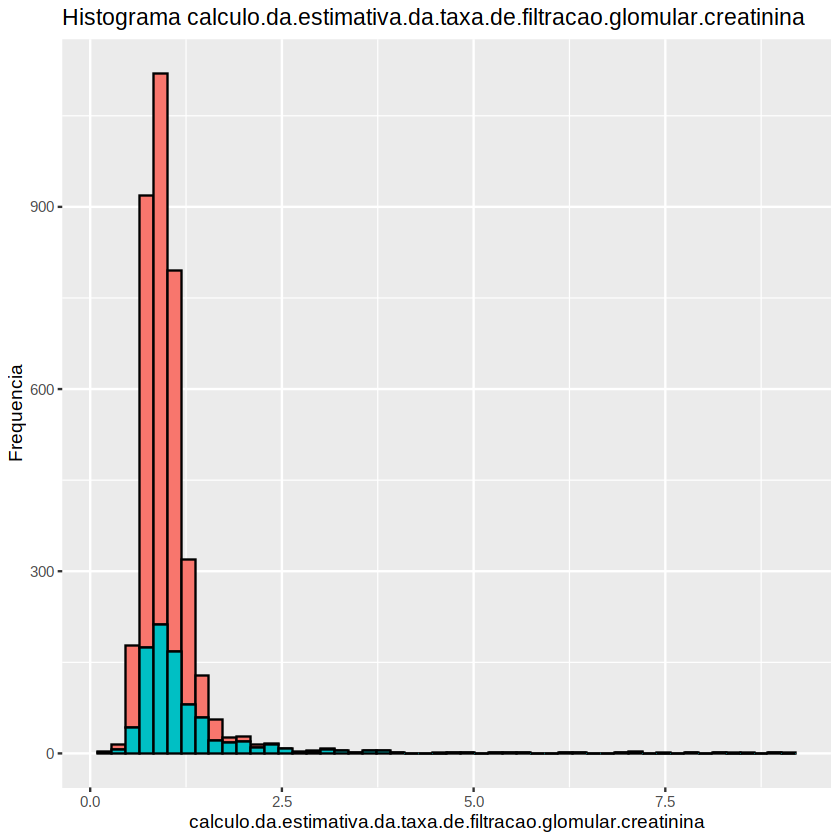

Warning message:
“Removed 651 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


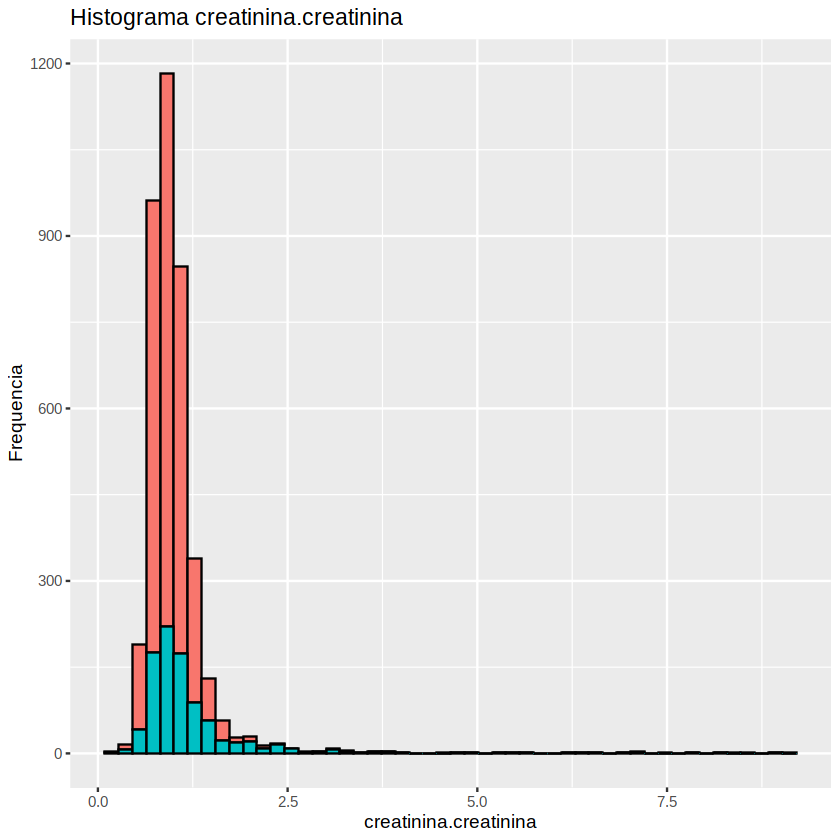

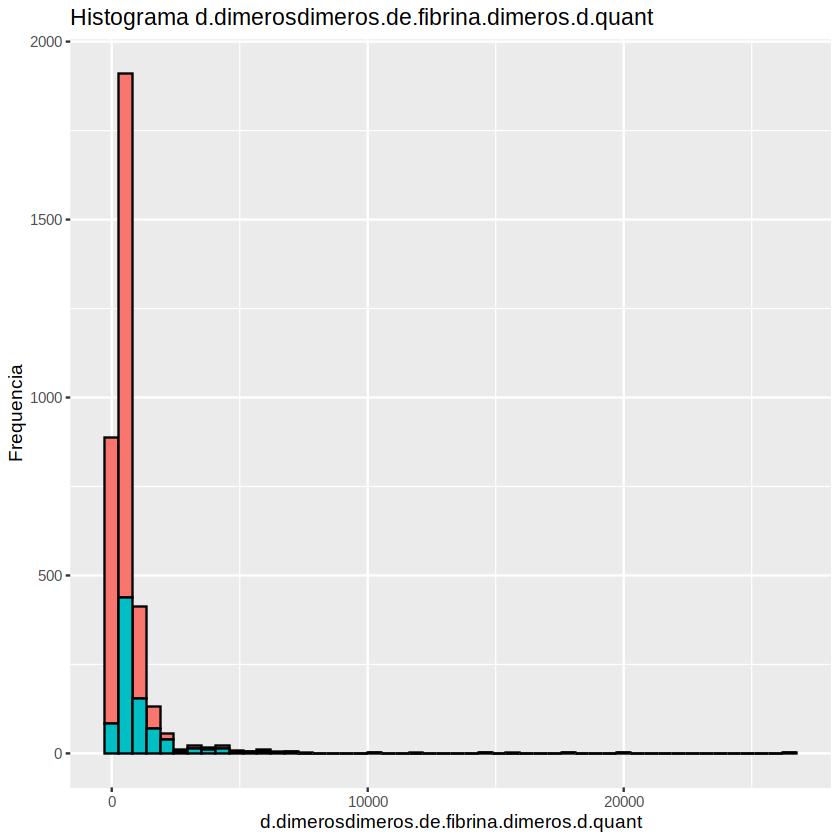

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


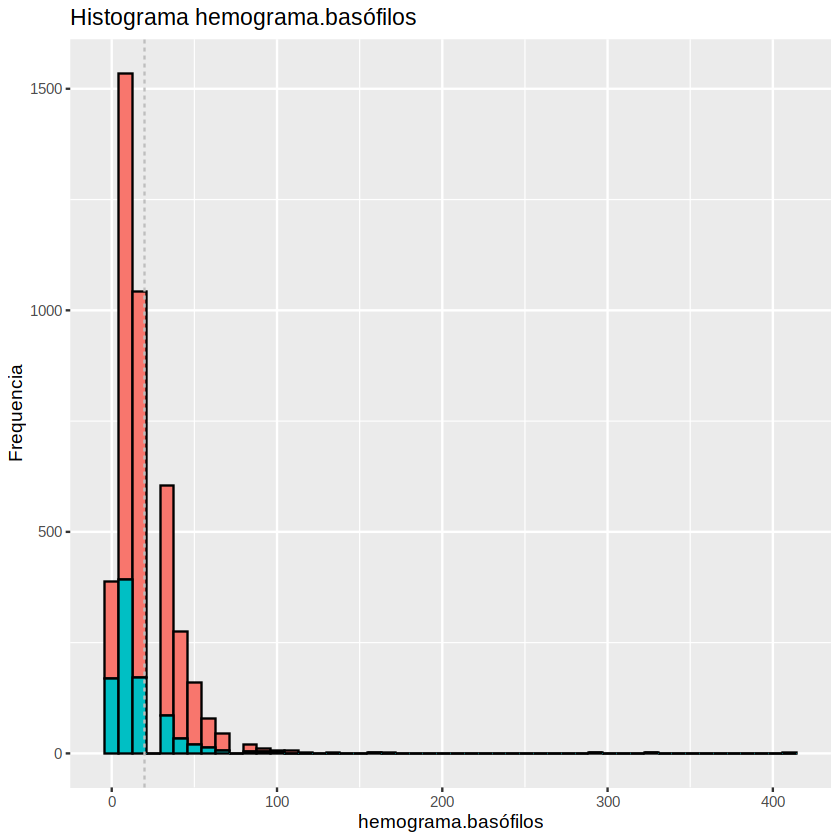

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


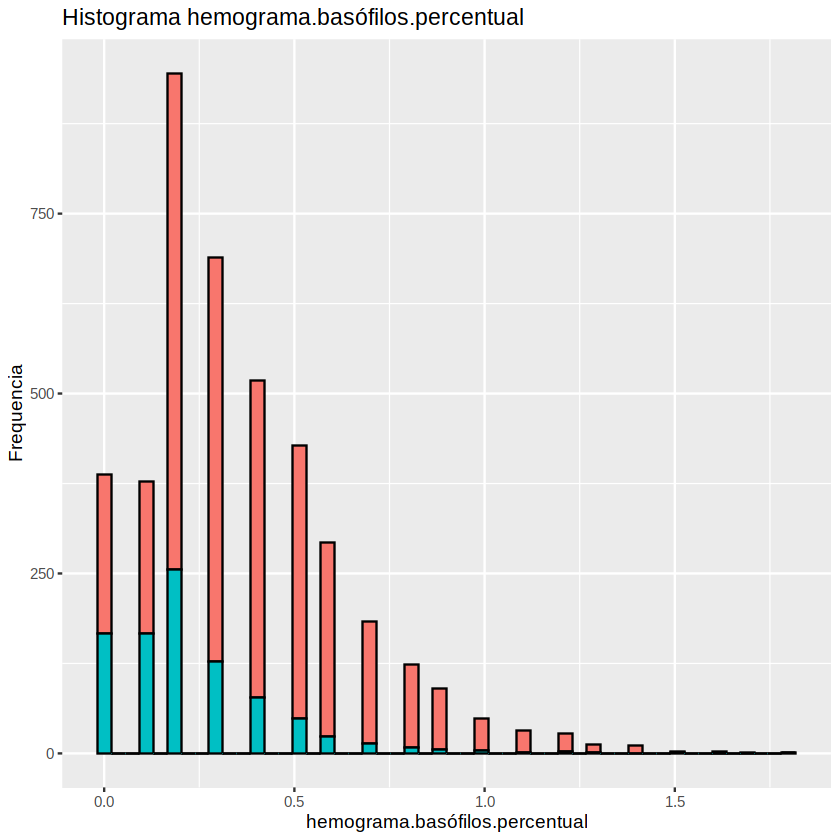

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


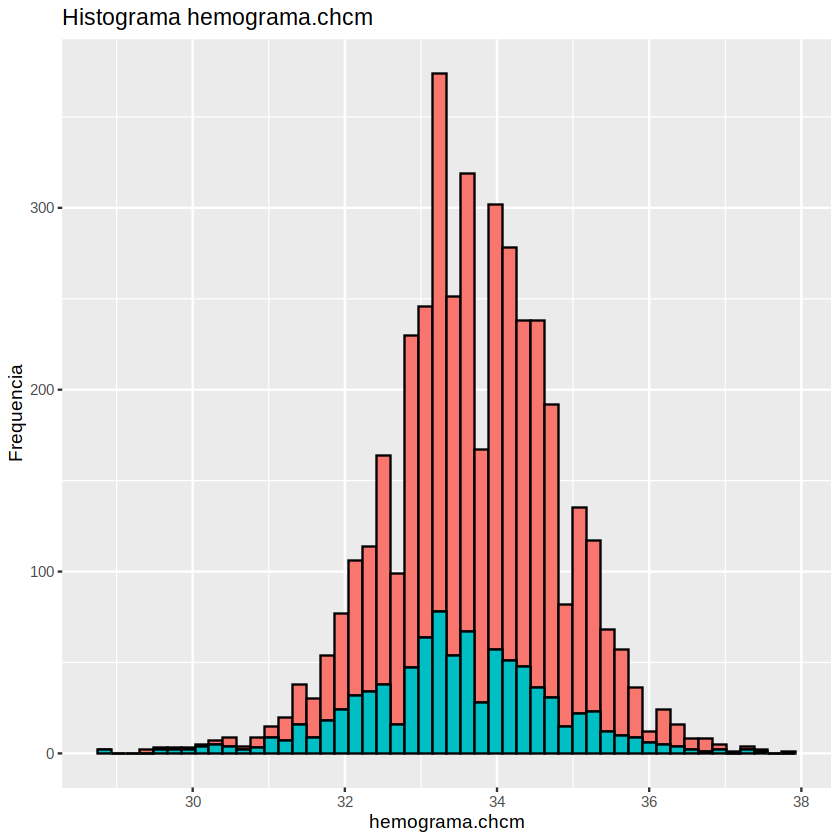

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


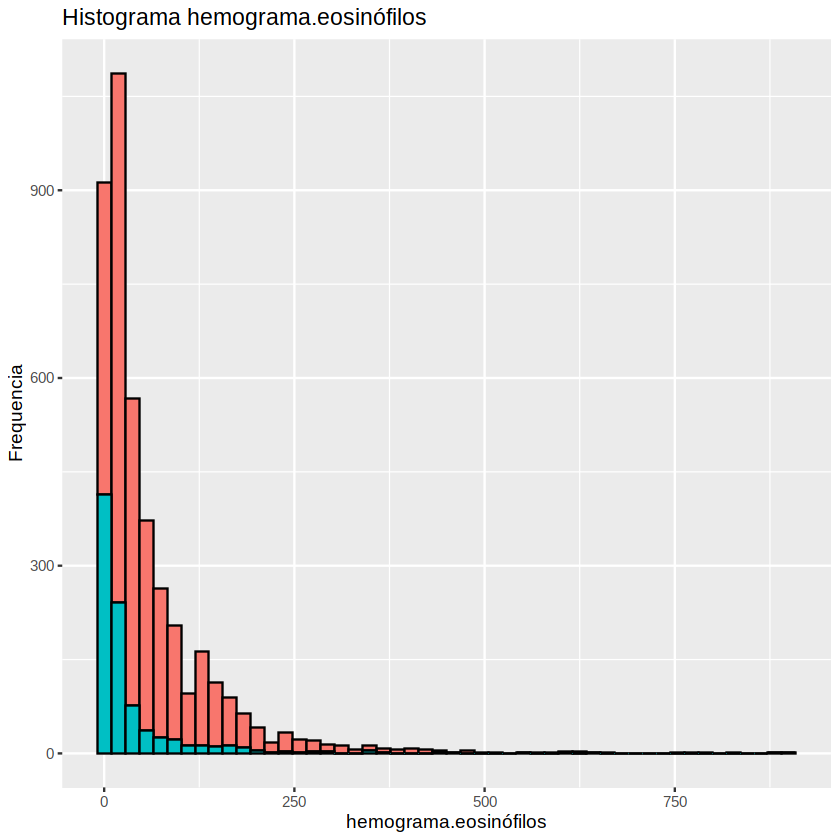

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


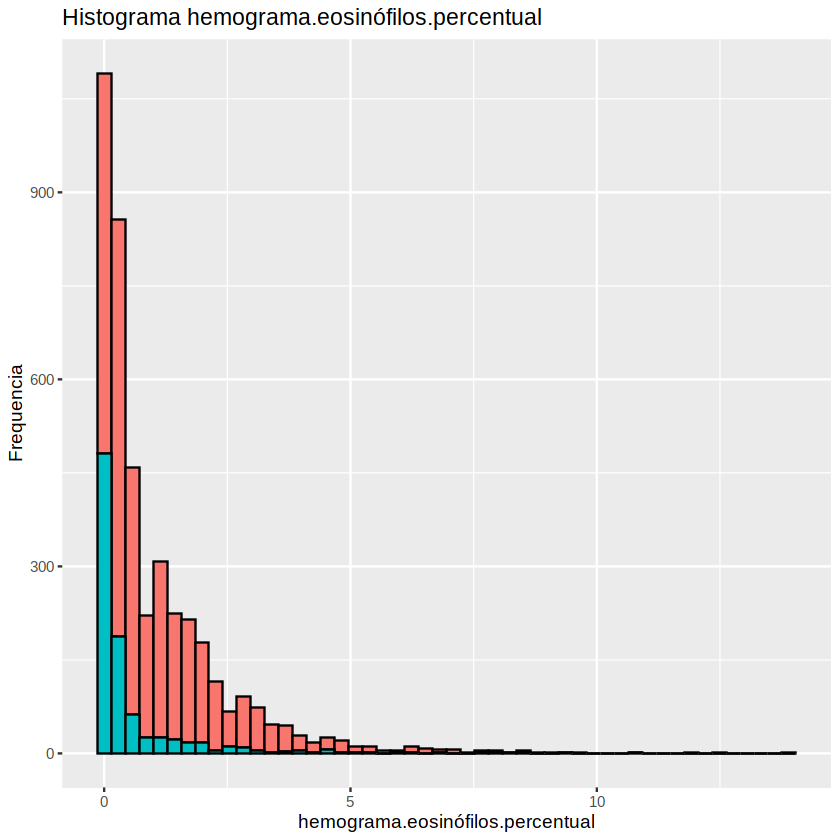

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


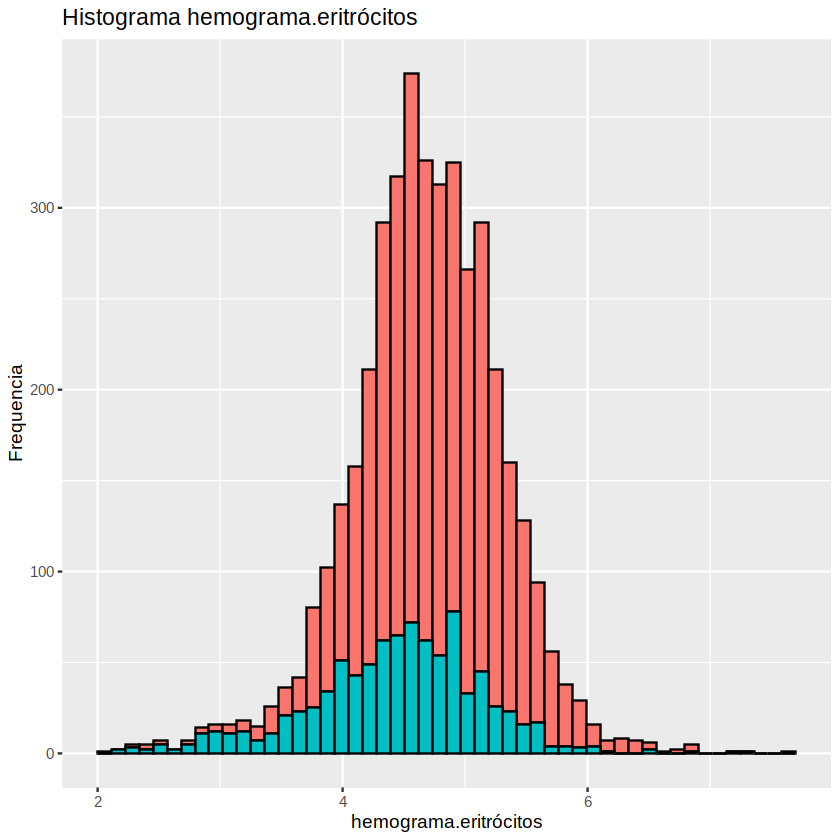

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


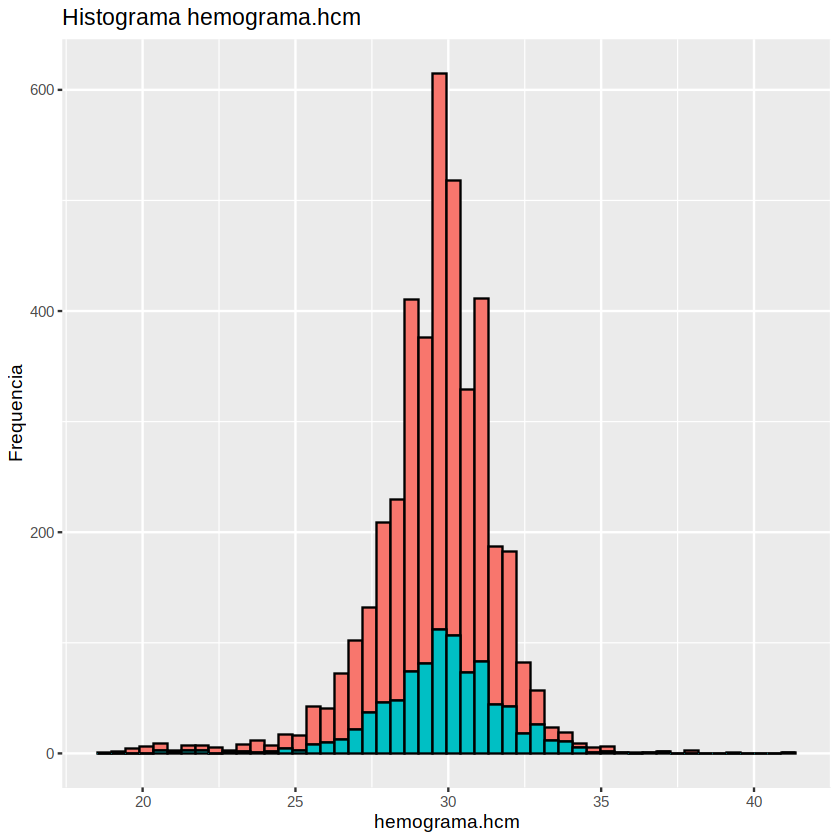

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


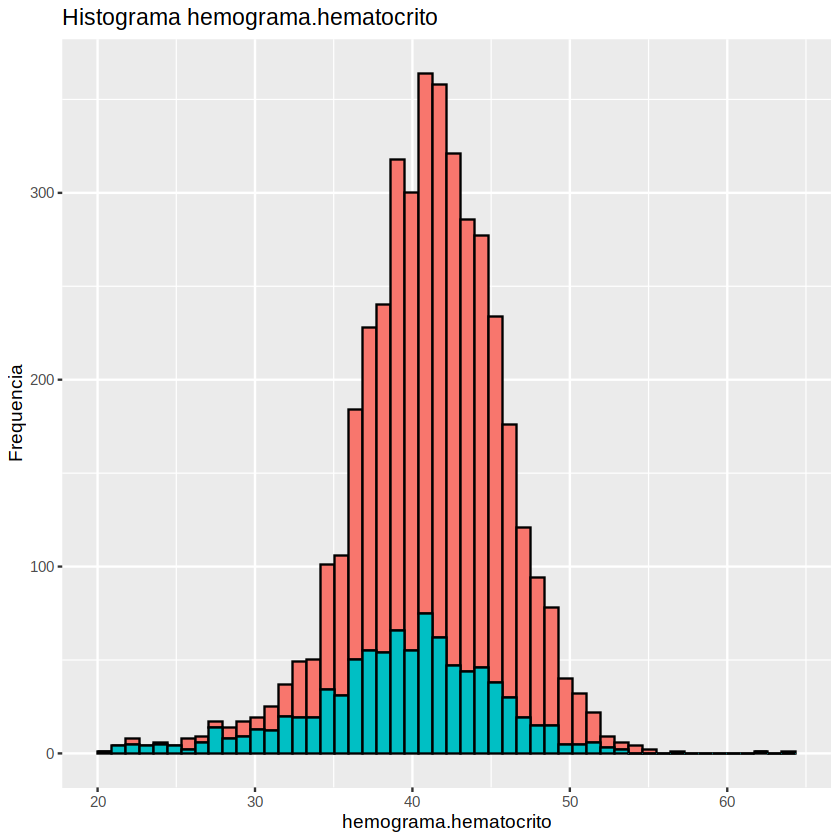

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


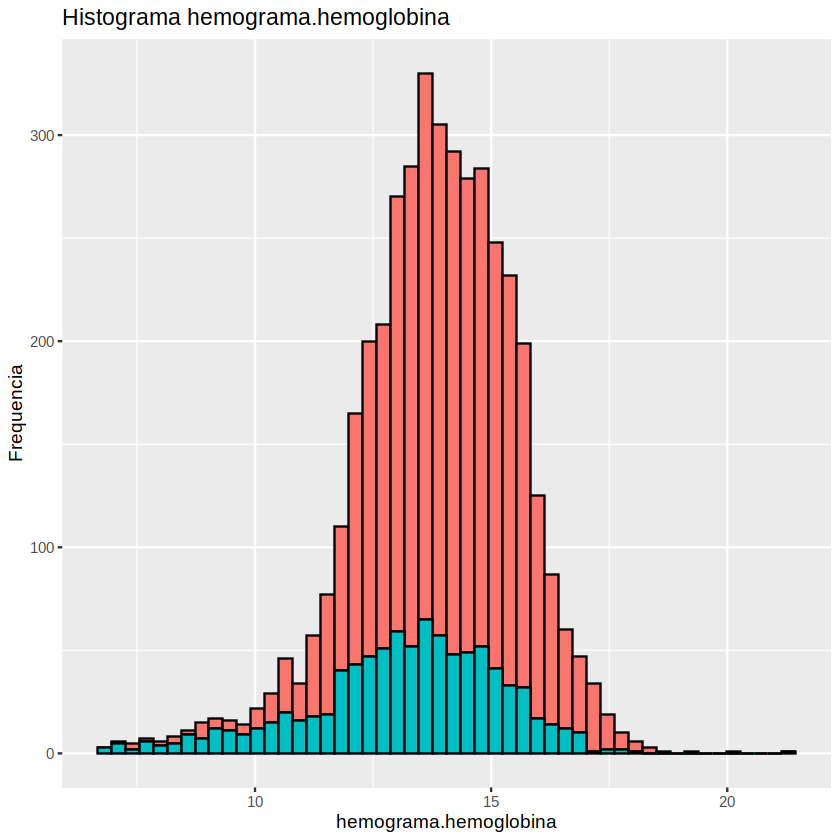

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


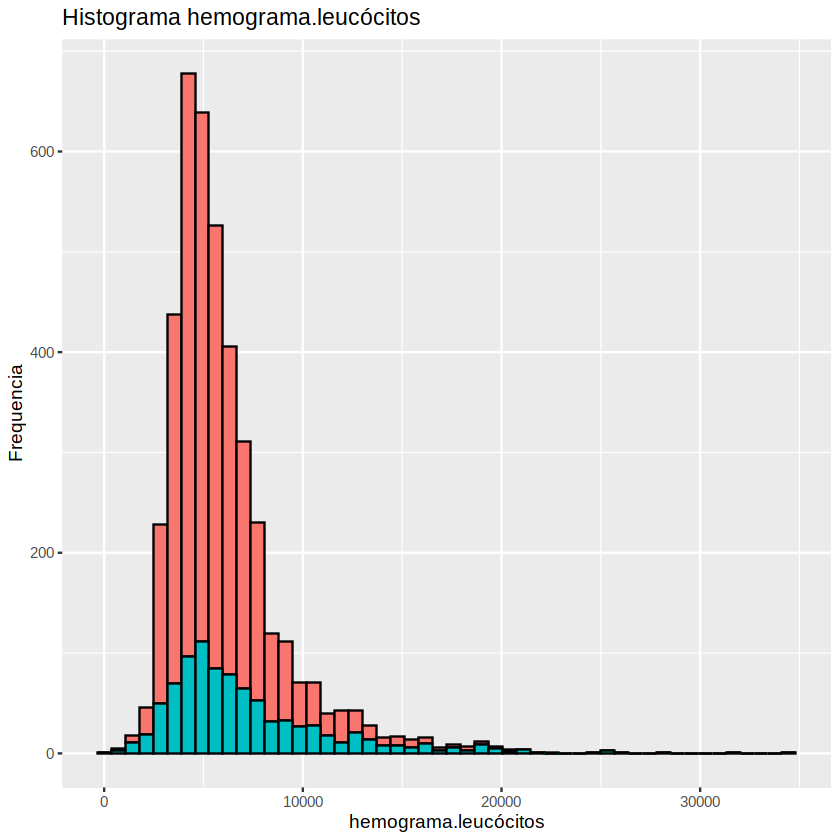

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


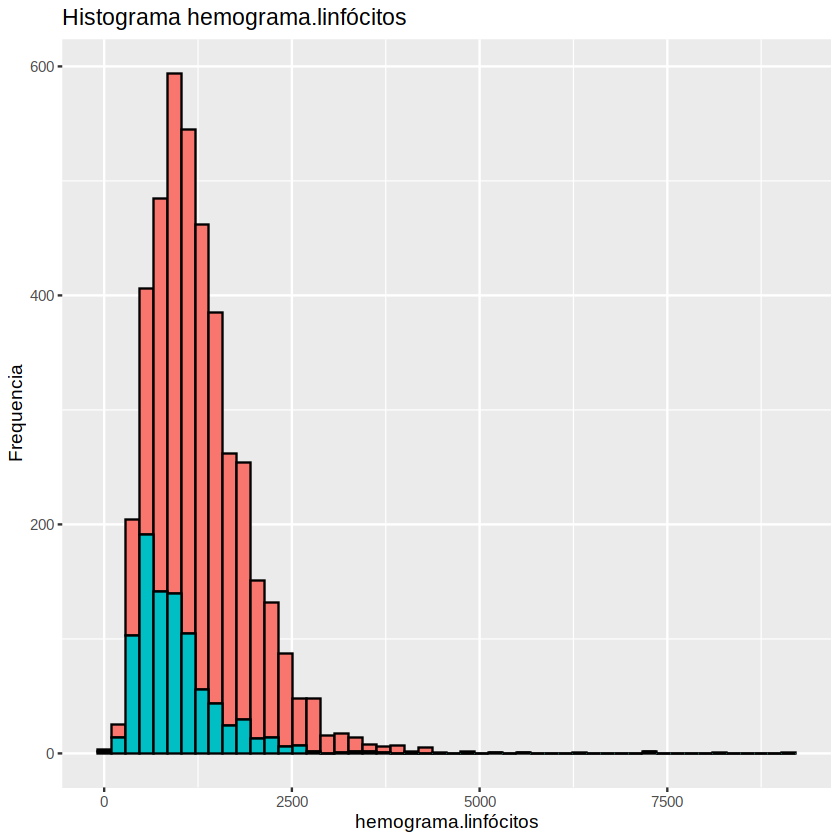

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


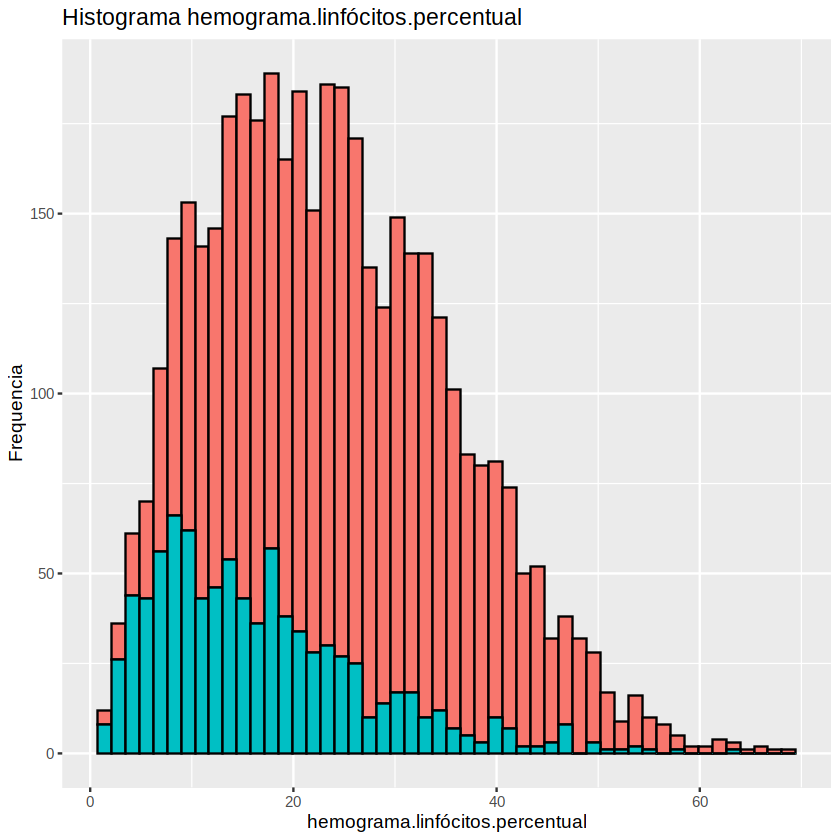

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


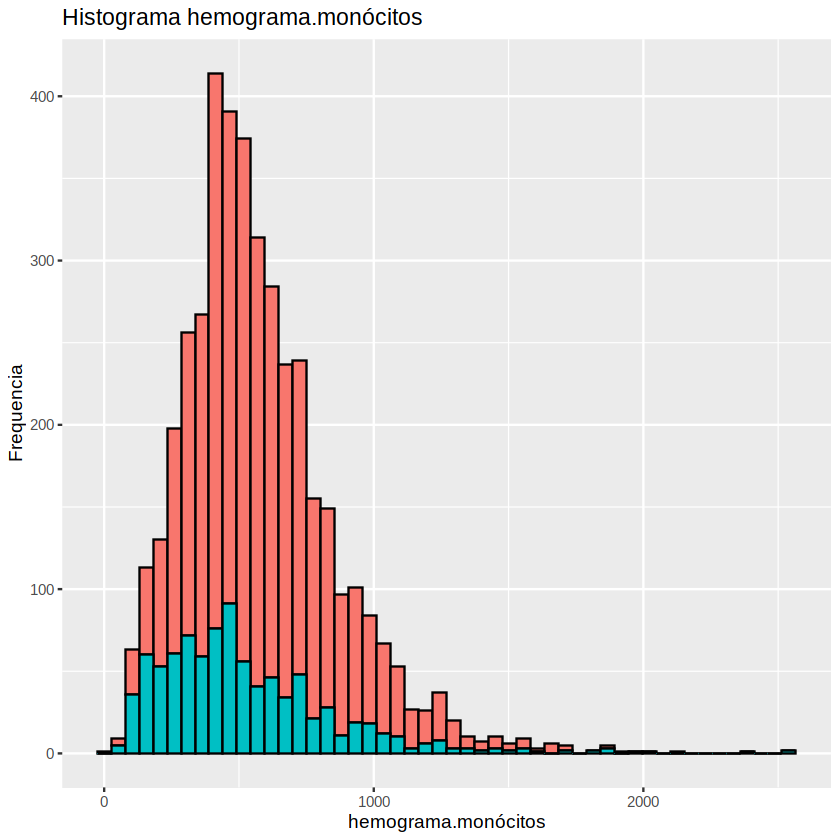

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


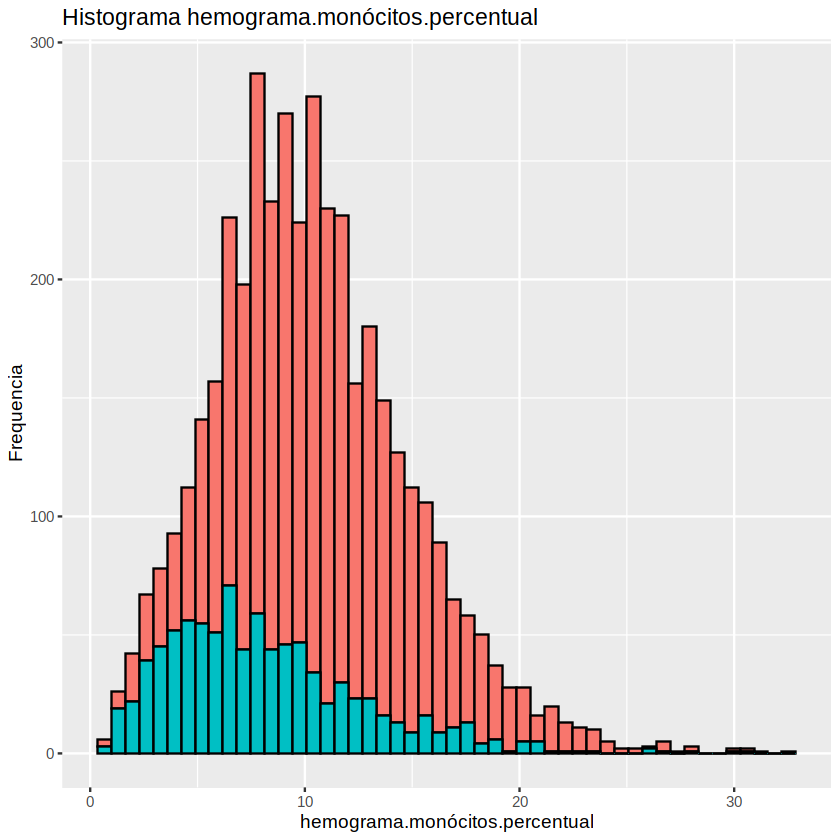

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


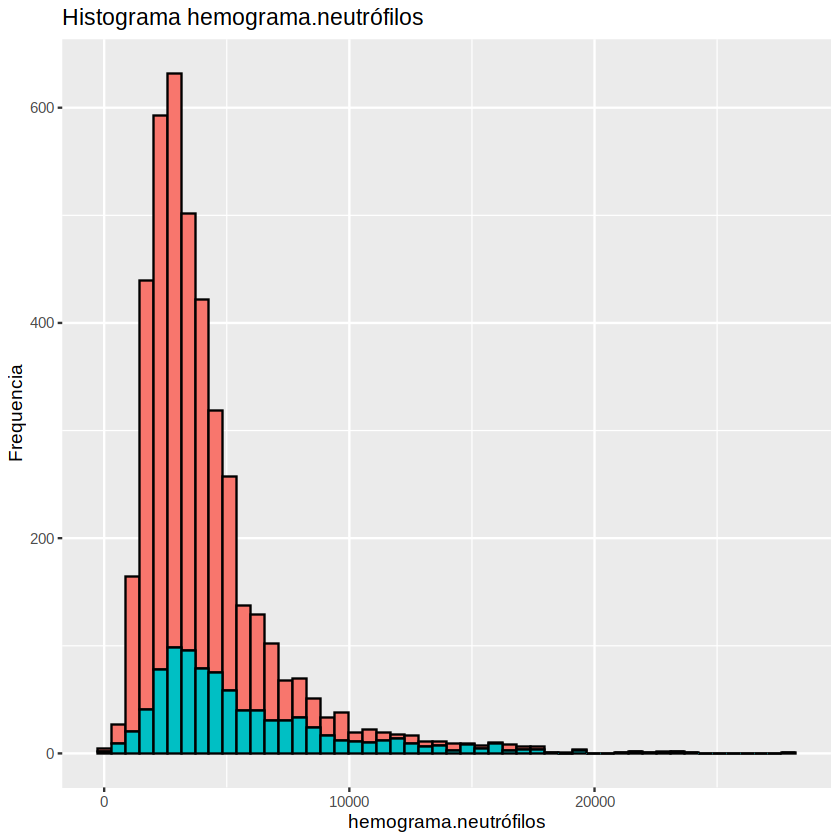

Warning message:
“Removed 7 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


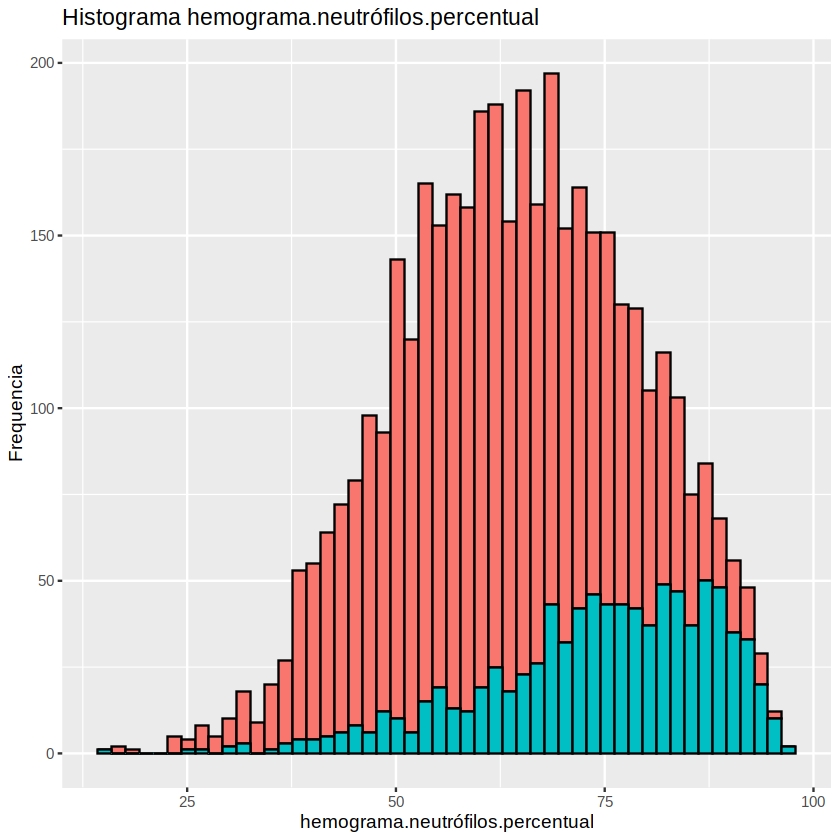

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


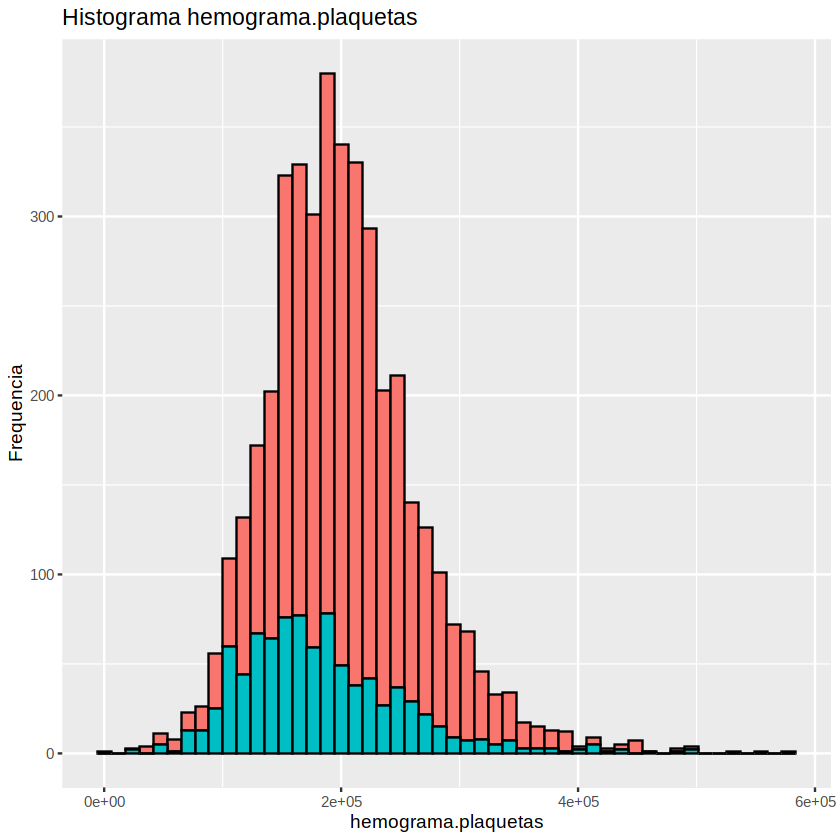

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


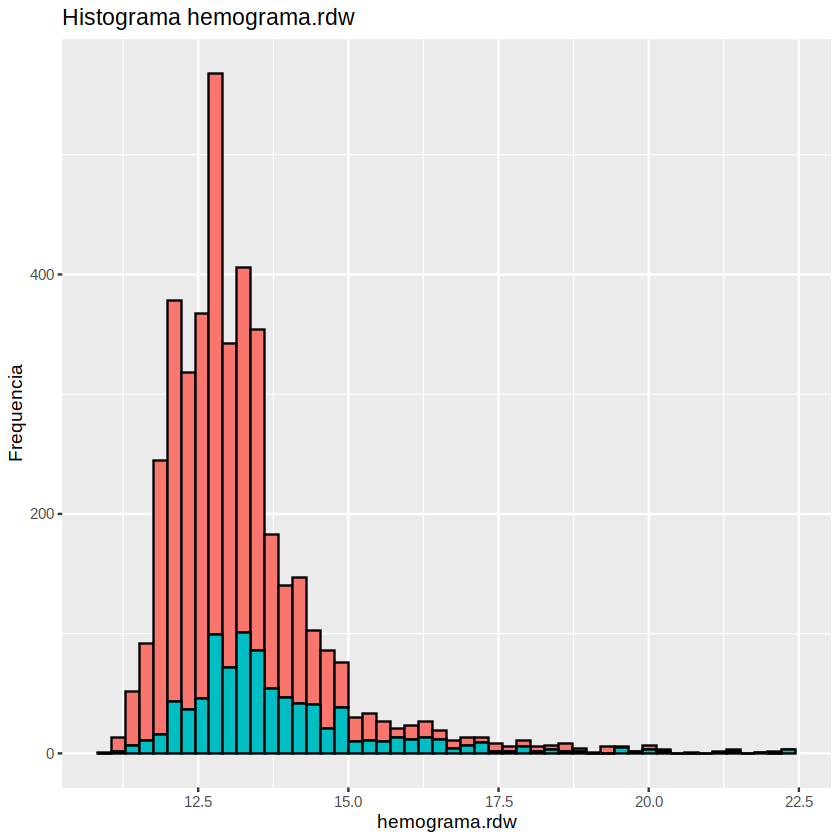

Warning message:
“Removed 66 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


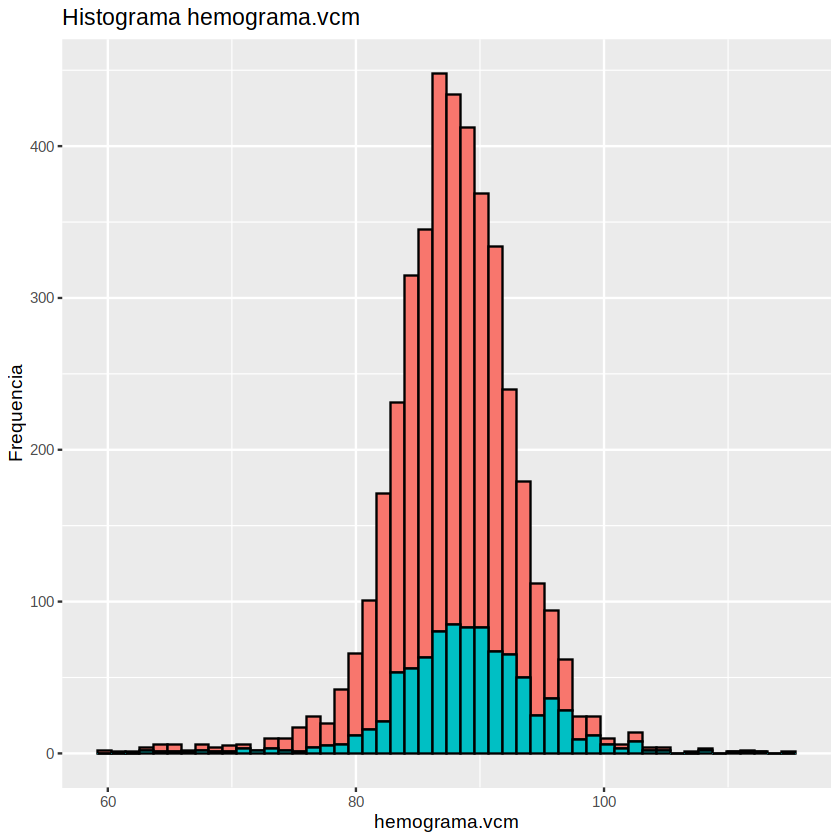

Warning message:
“Removed 598 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


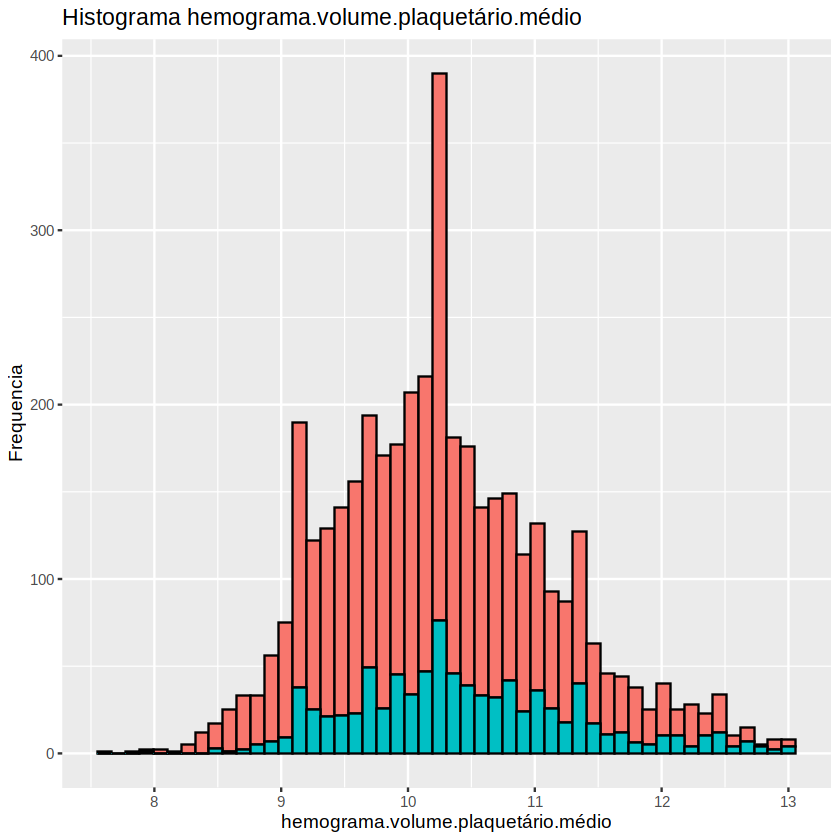

Warning message:
“Removed 83 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


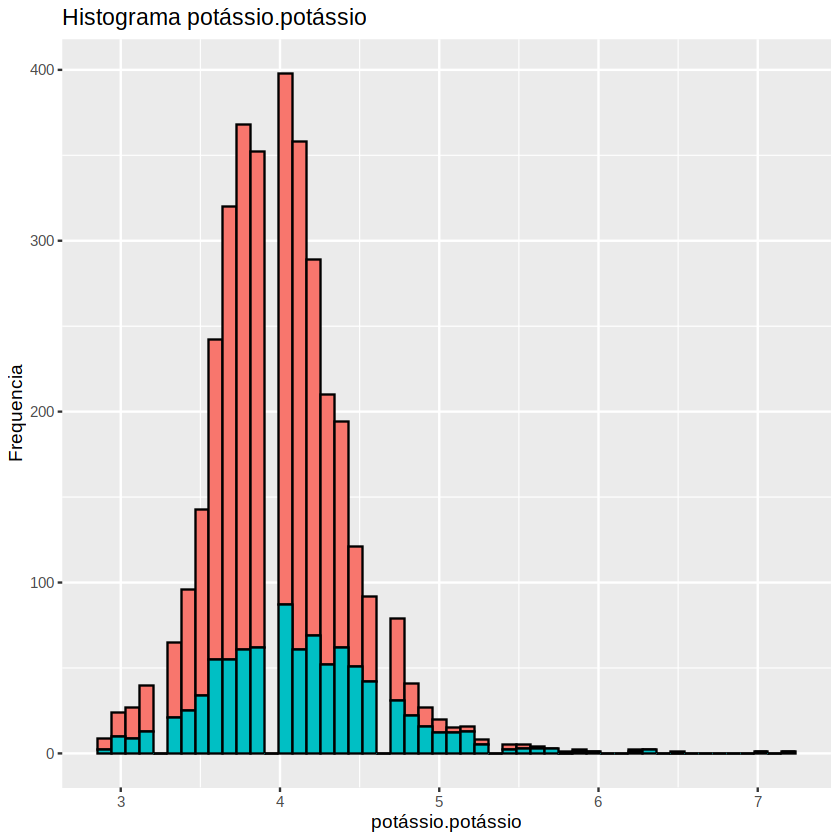

Warning message:
“Removed 590 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


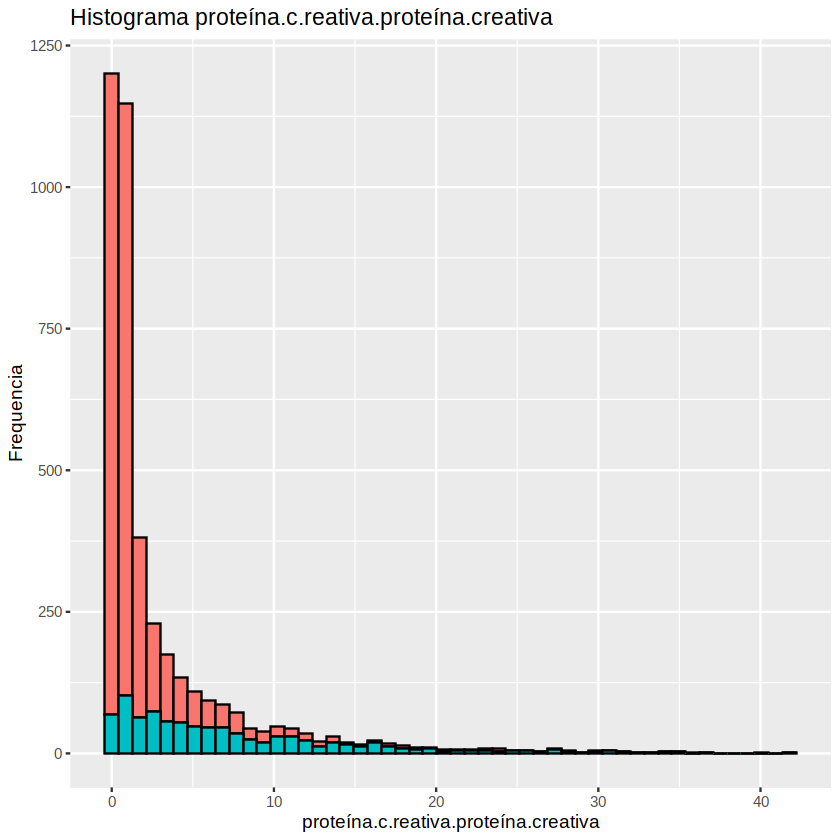

Warning message:
“Removed 1052 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


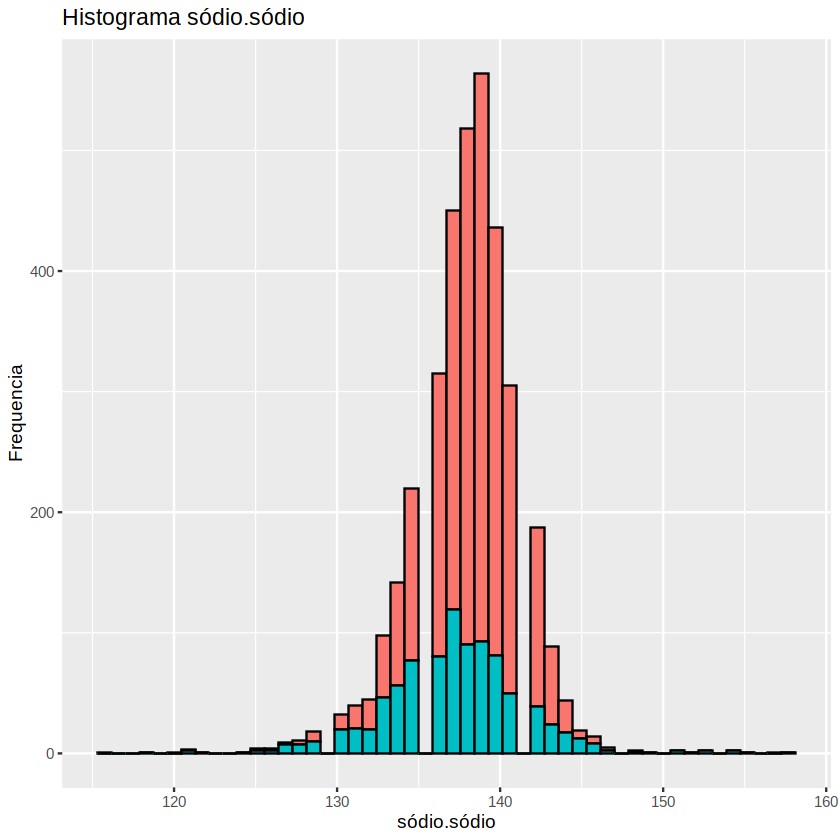

Warning message:
“Removed 1030 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


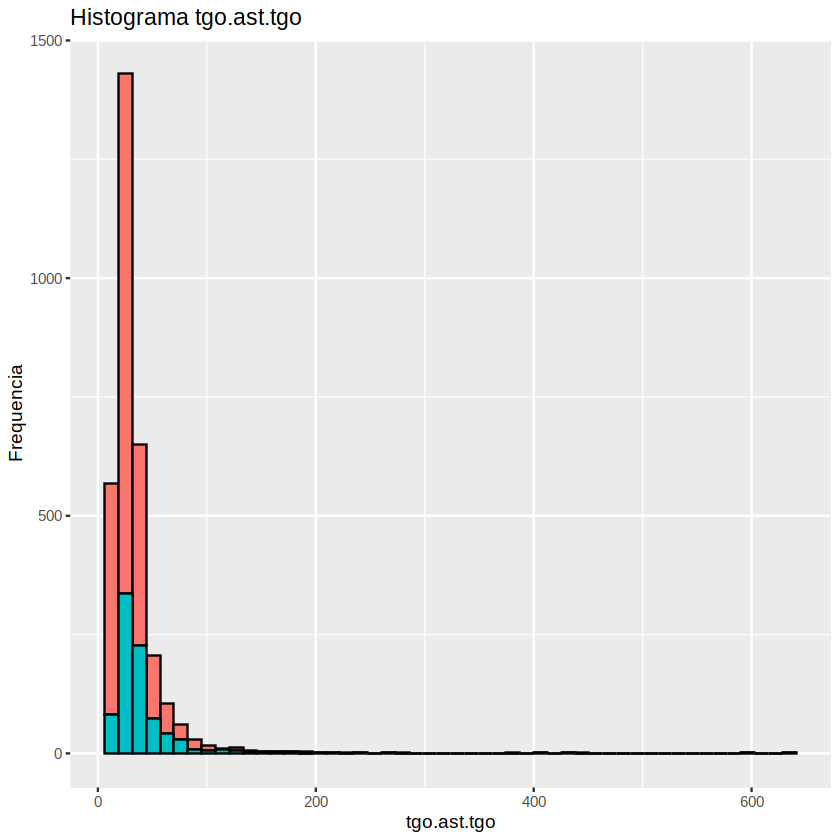

Warning message:
“Removed 350 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4180 rows containing missing values (geom_vline).”


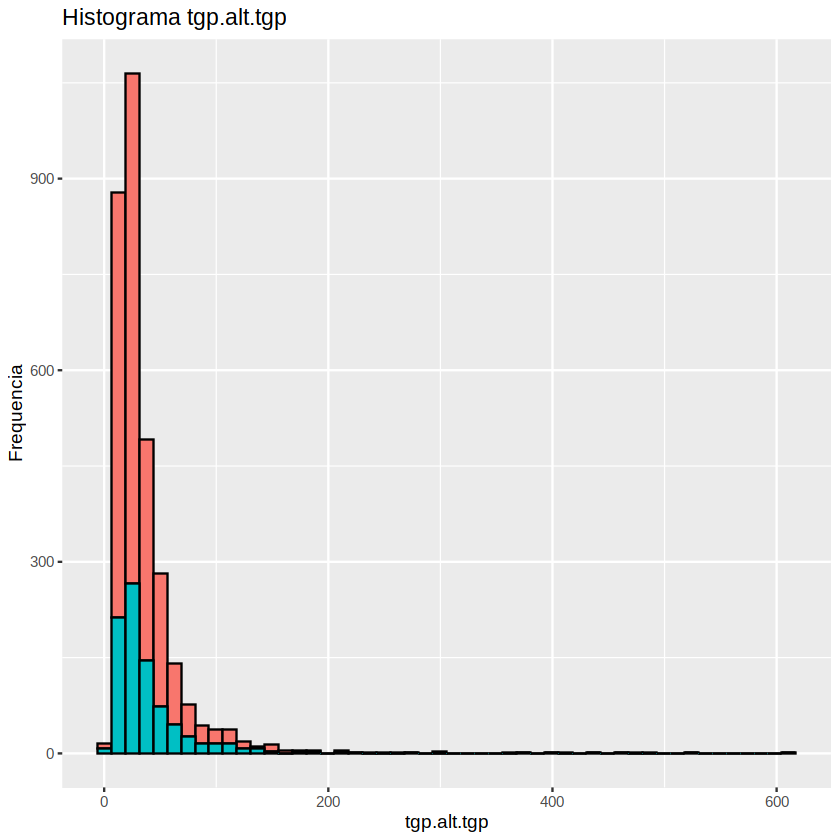

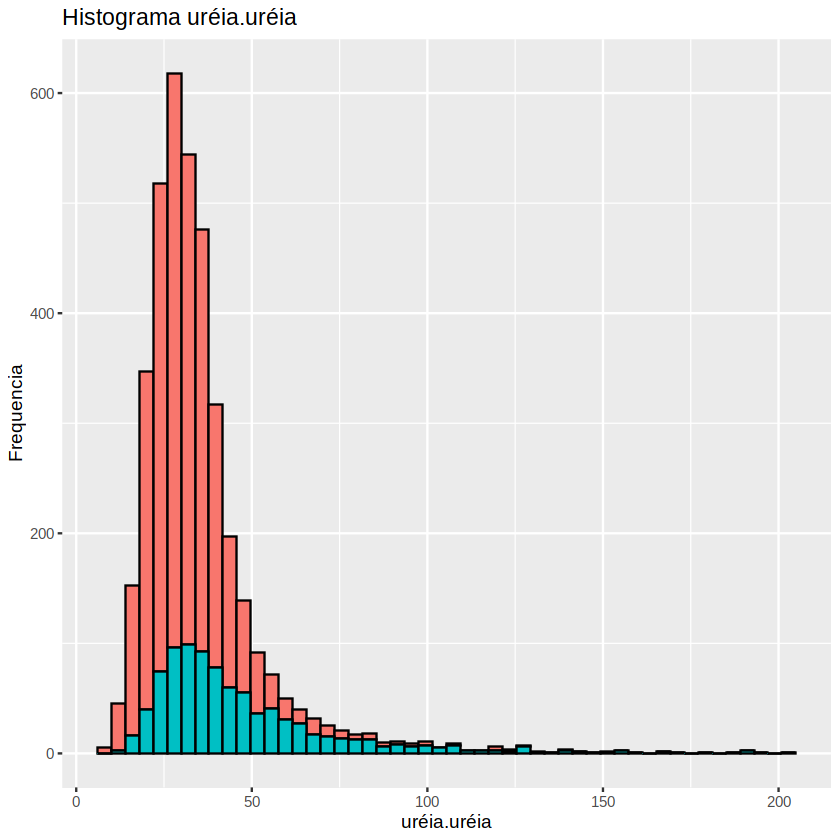

In [40]:
library(ggplot2)

for (i in (1:ncol(data))){

  label <- (data[i] %>% colnames)
  #label <- label %>% str_replace(".", "")
  exame <- data %>% select(i) %>% as.list
  exame[[1]] -> exame
  #b <-(max(exame)-min(exame))/50
  His <- ggplot(data=data, 
  aes(x=exame))+
  geom_histogram(bins = 50, color="black", aes(fill=factor(severity))) +  
  xlab(label) +   ylab("Frequencia") +      
  theme(legend.position="none")+  ggtitle(paste("Histograma", label))+      
  geom_vline(data=data, aes(xintercept = median(exame)),linetype="dashed",color="grey")
  show(His)
}



In [41]:
#remove atipical features
data %>% select(-c(calculo.da.estimativa.da.taxa.de.filtracao.glomular.cálculo.pafrodescendente.ckdepi,
calculo.da.estimativa.da.taxa.de.filtracao.glomular.cálculo.pafrodescendente.mdrd,
calculo.da.estimativa.da.taxa.de.filtracao.glomular.cálculo.pnão.afrodescendente.ckdepi,
calculo.da.estimativa.da.taxa.de.filtracao.glomular.cálculo.pnão.afrodescendente.mdrd,
calculo.da.estimativa.da.taxa.de.filtracao.glomular.creatinina)) -> data

In [42]:
#dimensions
data %>% dim

#check class numbers
data %>% count(severity)

#check column names
data %>% colnames

#move the target feature 
data %>% select(severity) -> severity
data %>% select(-severity) -> dado
cbind(dado,severity) -> data

#check column names
data %>% colnames

[1] 4180   31

severity,n
<dbl>,<int>
0,3275
1,905


[1] "sex"                                        
 [2] "age"                                        
 [3] "severity"                                   
 [4] "creatinina.creatinina"                      
 [5] "d.dimerosdimeros.de.fibrina.dimeros.d.quant"
 [6] "hemograma.basófilos"                        
 [7] "hemograma.basófilos.percentual"             
 [8] "hemograma.chcm"                             
 [9] "hemograma.eosinófilos"                      
[10] "hemograma.eosinófilos.percentual"           
[11] "hemograma.eritrócitos"                      
[12] "hemograma.hcm"                              
[13] "hemograma.hematocrito"                      
[14] "hemograma.hemoglobina"                      
[15] "hemograma.leucócitos"                       
[16] "hemograma.linfócitos"                       
[17] "hemograma.linfócitos.percentual"            
[18] "hemograma.monócitos"                        
[19] "hemograma.monócitos.percentual"             
[20] "hemograma.neutrófilos"                      
[21] "hemograma.neutrófilos.percentual"           
[22] "hemograma.plaquetas"                        
[23] "hemograma.rdw"                              
[24] "hemograma.vcm"                              
[25] "hemograma.volume.plaquetário.médio"         
[26] "potássio.potássio"                          
[27] "proteína.c.reativa.proteína.creativa"       
[28] "sódio.sódio"                                
[29] "tgo.ast.tgo"                                
[30] "tgp.alt.tgp"                                
[31] "uréia.uréia"

[1] "sex"                                        
 [2] "age"                                        
 [3] "creatinina.creatinina"                      
 [4] "d.dimerosdimeros.de.fibrina.dimeros.d.quant"
 [5] "hemograma.basófilos"                        
 [6] "hemograma.basófilos.percentual"             
 [7] "hemograma.chcm"                             
 [8] "hemograma.eosinófilos"                      
 [9] "hemograma.eosinófilos.percentual"           
[10] "hemograma.eritrócitos"                      
[11] "hemograma.hcm"                              
[12] "hemograma.hematocrito"                      
[13] "hemograma.hemoglobina"                      
[14] "hemograma.leucócitos"                       
[15] "hemograma.linfócitos"                       
[16] "hemograma.linfócitos.percentual"            
[17] "hemograma.monócitos"                        
[18] "hemograma.monócitos.percentual"             
[19] "hemograma.neutrófilos"                      
[20] "hemograma.neutrófilos.percentual"           
[21] "hemograma.plaquetas"                        
[22] "hemograma.rdw"                              
[23] "hemograma.vcm"                              
[24] "hemograma.volume.plaquetário.médio"         
[25] "potássio.potássio"                          
[26] "proteína.c.reativa.proteína.creativa"       
[27] "sódio.sódio"                                
[28] "tgo.ast.tgo"                                
[29] "tgp.alt.tgp"                                
[30] "uréia.uréia"                                
[31] "severity"

In [43]:
#rename features
names(data) <- c('Sex','Age','Creatinine',
                 'D-dimers','Basophils','Basophils(%)',
                 'MCHC','Eosinophils','Eosinophils(%)',
                 'Erythrocytes','MCH','Hematocrits',
                 'Hemoglobin','Leukocytes','Lymphocytes',
                 'Lymphocytes(%)','Monocytes','Monocytes(%)',
                 'Neutrophils','Neutrophils(%)','Platelet count',
                 'RDW','MCV','MPV',
                 'Potassium','C-reative protein','Sodium',
                 'GOT','GPT','Urea','Severity')

In [44]:
#write a csv
data %>% write_csv('hosp1.csv')

In [45]:
#check NAs percentage in each column
colMeans(is.na(data)) %>% as.data.frame

,.
,<dbl>
Sex,0.0000000000
Age,0.0370813397
Creatinine,0.0715311005
D-dimers,0.1557416268
Basophils,0.0000000000
Basophils(%),0.0014354067
MCHC,0.0011961722
Eosinophils,0.0009569378
Eosinophils(%),0.0009569378


In [46]:
#summary age and sex
data %>% count(Sex)
data %>% select(Age) %>% summary

Sex,n
<dbl>,<int>
0,2399
1,1781


      Age       
 Min.   : 0.00  
 1st Qu.:40.00  
 Median :52.00  
 Mean   :52.56  
 3rd Qu.:65.00  
 Max.   :87.00  
 NA's   :155    

In [47]:
#check colnames
data %>% colnames

[1] "Sex"               "Age"               "Creatinine"       
 [4] "D-dimers"          "Basophils"         "Basophils(%)"     
 [7] "MCHC"              "Eosinophils"       "Eosinophils(%)"   
[10] "Erythrocytes"      "MCH"               "Hematocrits"      
[13] "Hemoglobin"        "Leukocytes"        "Lymphocytes"      
[16] "Lymphocytes(%)"    "Monocytes"         "Monocytes(%)"     
[19] "Neutrophils"       "Neutrophils(%)"    "Platelet count"   
[22] "RDW"               "MCV"               "MPV"              
[25] "Potassium"         "C-reative protein" "Sodium"           
[28] "GOT"               "GPT"               "Urea"             
[31] "Severity"